In [1]:
import matplotlib.pyplot as plt
from pot_correction import *
from uncertain_dp2 import *

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [4]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
#check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [5]:



def compare_and_plot(read_correctors: list[t.Callable[[list[Read]],list[Read]]],*, names: list[str]=None,  iterations=4):
    if names is None:
        names = [str(i) for i in range(len(read_correctors))]

    all: list[list[float]] = [[] for _ in read_correctors]
    for _ in range(iterations):

        dna = generate_dna(DNA_LENGTH)
        reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

        for j, corrector in enumerate(read_correctors):
            corrected_reads = corrector(reads)
            all[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))


    plt.bar(
        names,
        [np.mean(measurement_row) for measurement_row in all],
        yerr=[pd.Series(measurement_row).sem() for measurement_row in all],
        capsize=6
    )

In [31]:
read_lengths = [3,5,10,15,30,60,100]

results = [[] for _ in read_lengths]
error_rates = []

for i in range(4):
    
    for j,read_length in enumerate(read_lengths):
        reads = [generate_read(dna, read_length, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
        
        for r in reads:
            r.uncertain_text = [gauss_unsharp_uncertainty_generator(base, error_rate) for base in r.original_text]
        
        error_rates.append(dna_distance_error_rate(dna, reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))
        corrected_reads = correct_reads_with_consens(reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS, probabilistic=True)
        results[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

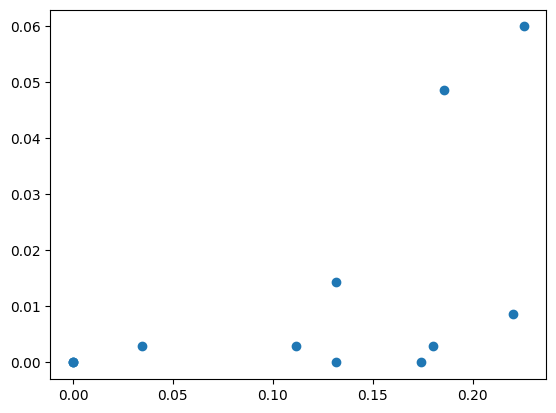

In [ ]:
plt.scatter(error_rates, [np.mean(measurement_row) for measurement_row in results], label="mean")

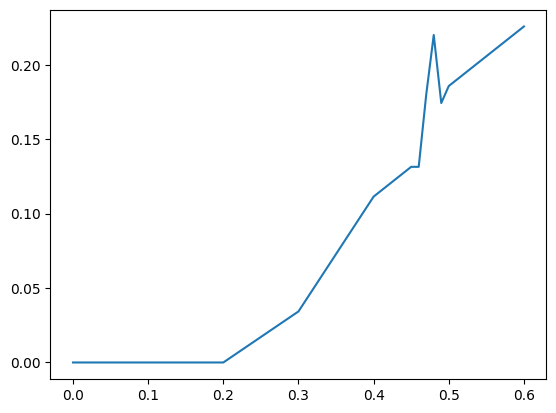

In [ ]:
plt.plot(read_lengths, error_rates)